# AEROSP 536 Electric Propulsion: Homework 4
Jason Chen

---

## Problem 1: Single Particle Motion in a Magnetic Field

### Problem Statement

Consider an electron with charge $-q$ and mass $m_e$ in a uniform magnetic field $\vec{B} = B_0\hat{z}$. The electron has initial velocity $\vec{v}_0 = v_{\perp 0}\hat{y} + v_{z0}\hat{z}$ where $5v_{z0} = v_{\perp 0}$. As with all charged particles in a magnetic field, the particle is subject to a Lorentz force $\vec{F}_L = -q\vec{v} \times \vec{B}$.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

### Part (a) - Derivation of Electron Trajectory

**Task:** Show that the electron trajectory at time $t$ is given by:
$$\vec{r} = r_L \cos(\omega_{ce}t)\hat{x} + r_L \sin(\omega_{ce}t)\hat{y} + v_{z0}t\hat{z} + \vec{x}_0 - r_L\hat{x}$$


First, we'll set up the equations of motion. The Lorentz force on an electron with charge $-q$ is:
$$\vec{F}_L = -q\vec{v} \times \vec{B}$$

Newton's second law gives:
$$m_e \frac{d\vec{v}}{dt} = -q\vec{v} \times \vec{B}$$

Let $\vec{v} = v_x\hat{x} + v_y\hat{y} + v_z\hat{z}$ and $\vec{B} = B_0\hat{z}$.

We want to find the equations in component form. The cross product is:
$$\vec{v} \times \vec{B} = \begin{vmatrix} \hat{x} & \hat{y} & \hat{z} \\ v_x & v_y & v_z \\ 0 & 0 & B_0 \end{vmatrix} = v_y B_0 \hat{x} - v_x B_0 \hat{y}$$

and so:

$$m_e \frac{dv_x}{dt} = -q v_y B_0$$
$$m_e \frac{dv_y}{dt} = -q(-v_x B_0) = q v_x B_0$$
$$m_e \frac{dv_z}{dt} = 0$$

By definition, the electron cyclotron frequency is:
$$\omega_{ce} = \frac{qB_0}{m_e}$$

$$\frac{dv_x}{dt} = -\omega_{ce} v_y$$
$$\frac{dv_y}{dt} = \omega_{ce} v_x$$
$$\frac{dv_z}{dt} = 0$$


Since $\frac{dv_z}{dt} = 0$, we have:
$$v_z(t) = v_{z0} = \text{constant}$$

Differentiating the first equation:
$$\frac{d^2v_x}{dt^2} = -\omega_{ce} \frac{dv_y}{dt} = -\omega_{ce}(\omega_{ce} v_x) = -\omega_{ce}^2 v_x$$

This is a simple harmonic oscillator equation with solution:
$$v_x(t) = A\cos(\omega_{ce}t) + B\sin(\omega_{ce}t)$$

From the first equation:
$$v_y(t) = -\frac{1}{\omega_{ce}}\frac{dv_x}{dt} = A\sin(\omega_{ce}t) - B\cos(\omega_{ce}t)$$

Now, we can apply the initial conditions.

At $t=0$: $\vec{v}(0) = v_{\perp 0}\hat{y} + v_{z0}\hat{z}$, so $v_x(0) = 0$ and $v_y(0) = v_{\perp 0}$.

From $v_x(0) = 0$: $A = 0$

From $v_y(0) = v_{\perp 0}$: $-B = v_{\perp 0}$, so $B = -v_{\perp 0}$

Therefore:
$$v_x(t) = -v_{\perp 0}\sin(\omega_{ce}t)$$
$$v_y(t) = v_{\perp 0}\cos(\omega_{ce}t)$$
$$v_z(t) = v_{z0}$$

So now, we can integrate each component to find the position function.
$$x(t) = \int v_x\,dt = -v_{\perp 0}\int \sin(\omega_{ce}t)\,dt = \frac{v_{\perp 0}}{\omega_{ce}}\cos(\omega_{ce}t) + C_x$$
$$y(t) = \int v_y\,dt = v_{\perp 0}\int \cos(\omega_{ce}t)\,dt = \frac{v_{\perp 0}}{\omega_{ce}}\sin(\omega_{ce}t) + C_y$$
$$z(t) = \int v_z\,dt = v_{z0}t + C_z$$

The Larmor radius by definition is:
$$r_L = \frac{v_{\perp 0}}{\omega_{ce}} = \frac{m_e v_{\perp 0}}{qB_0}$$

So:
$$x(t) = r_L\cos(\omega_{ce}t) + C_x$$
$$y(t) = r_L\sin(\omega_{ce}t) + C_y$$
$$z(t) = v_{z0}t + C_z$$

Once again we need to find the integration constants. Let the initial position be $\vec{x}_0 = x_0\hat{x} + y_0\hat{y} + z_0\hat{z}$.

At $t=0$:
$$x(0) = r_L + C_x = x_0 \quad \Rightarrow \quad C_x = x_0 - r_L$$
$$y(0) = 0 + C_y = y_0 \quad \Rightarrow \quad C_y = y_0$$
$$z(0) = 0 + C_z = z_0 \quad \Rightarrow \quad C_z = z_0$$

So finally, the trajectory over time is:
$$\vec{r}(t) = [r_L\cos(\omega_{ce}t) + x_0 - r_L]\hat{x} + [r_L\sin(\omega_{ce}t) + y_0]\hat{y} + [v_{z0}t + z_0]\hat{z}$$

This can be written as:

$$\boxed{\vec{r}(t) = r_L \cos(\omega_{ce}t)\hat{x} + r_L \sin(\omega_{ce}t)\hat{y} + v_{z0}t\hat{z} + \vec{x}_0 - r_L\hat{x}}$$

This makes sense from what we learned in class. The physical interpretation is that the electron follows a helical path with circular motion in the $x$-$y$ plane (perpendicular to $\vec{B}$) and uniform motion along the $z$-axis (parallel to $\vec{B}$). The center of the circular motion is at $(x_0 - r_L, y_0, z_0)$.

### Part (b) - 3D Visualization of Electron Trajectory

**Task:** Suppose the initial position $\vec{x}(0) = r_L\hat{x}$. Draw in three dimensions the trajectory from part (a) from $t=0$ to $t=10 \times (2\pi/\omega_{ce})$. Label the Larmor radius $r_L$ and denote with an arrow the direction of travel of the electron.

With $\vec{x}_0 = r_L\hat{x}$, the trajectory simplifies to:
$$\vec{r}(t) = r_L \cos(\omega_{ce}t)\hat{x} + r_L \sin(\omega_{ce}t)\hat{y} + v_{z0}t\hat{z}$$

Note the center of gyration is at the origin, and that the direction of motion is indicated by the start/stop points.

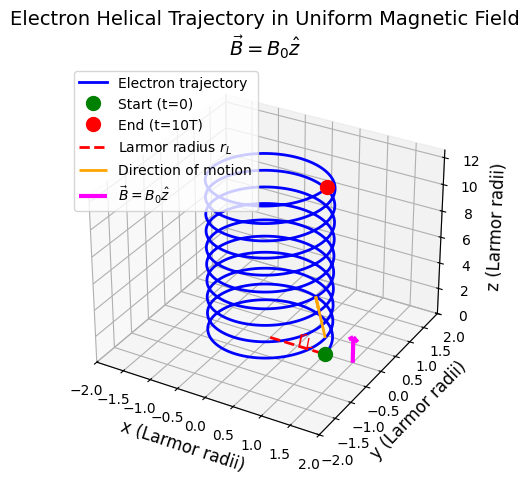

In [67]:
# Define parameters (normalized units for visualization)
r_L = 1.0  # Larmor radius (arbitrary units)
omega_ce = 1.0  # Cyclotron frequency (arbitrary units)
v_perp_0 = r_L * omega_ce  # Perpendicular velocity
v_z0 = v_perp_0 / 5  # Parallel velocity (given: 5*v_z0 = v_perp_0)
T_ce = 2 * np.pi / omega_ce  # Cyclotron period
t = np.linspace(0, 10 * T_ce, 1000)

# Calculate trajectory
x = r_L * np.cos(omega_ce * t)
y = r_L * np.sin(omega_ce * t)
z = v_z0 * t


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the helical trajectory
ax.plot(x, y, z, 'b-', linewidth=2, label='Electron trajectory')
# Mark starting point
ax.plot([x[0]], [y[0]], [z[0]], 'go', markersize=10, label='Start (t=0)', zorder=5)
# Mark ending point
ax.plot([x[-1]], [y[-1]], [z[-1]], 'ro', markersize=10, label='End (t=10T)', zorder=5)
# Draw Larmor radius at t=0
ax.plot([0, x[0]], [0, y[0]], [0, 0], 'r--', linewidth=2, label=f'Larmor radius $r_L$')
# Add direction arrow (at about t = T_ce)
idx = len(t) // 10
arrow_start = [x[idx], y[idx], z[idx]]
arrow_end = [x[idx+20], y[idx+20], z[idx+20]]
ax.quiver(arrow_start[0], arrow_start[1], arrow_start[2],
          arrow_end[0] - arrow_start[0], 
          arrow_end[1] - arrow_start[1], 
          arrow_end[2] - arrow_start[2],
          color='orange', arrow_length_ratio=0.3, linewidth=2, label='Direction of motion')

# Draw magnetic field direction
ax.quiver(1.5*r_L, 0, 0, 0, 0, 2*r_L, 
          color='magenta', arrow_length_ratio=0.15, linewidth=3, 
          label=r'$\vec{B} = B_0\hat{z}$')

# Labels and formatting
ax.set_xlabel('x (Larmor radii)', fontsize=12)
ax.set_ylabel('y (Larmor radii)', fontsize=12)
ax.set_zlabel('z (Larmor radii)', fontsize=12)
ax.set_title('Electron Helical Trajectory in Uniform Magnetic Field\n' + 
             r'$\vec{B} = B_0\hat{z}$', fontsize=14)
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(0, z.max())

# Add text annotation for Larmor radius
ax.text(x[0]/2, y[0]/2, 0, '$r_L$', fontsize=14, color='red', fontweight='bold')
plt.tight_layout()
plt.show()


### Part (c) - Larmor Radius in Variable Magnetic Field

**Task:** Consider the case where the magnetic field has a variable magnitude $B_0(z)$. For magnetized electrons in regions where the change in magnetic field is sufficiently weak compared to the Larmor radius ($r_L|\nabla B/B| \ll 1$), the magnetic moment is constant:

$$\mu = \frac{m_e v_\perp^2}{2B_0}$$

Suppose a particle starts at position $z=0$ with Larmor radius $r_{L0}$. Find an expression for the Larmor radius $r_L(z)$ at position $z$ as a function of the initial Larmor radius $r_{L0}$, the initial magnetic field magnitude $B_0(0)$, and the local magnetic field amplitude $B_0(z)$.

First, we write the magnetic moment at $z=0$. At the initial position $z=0$:
$$\mu = \frac{m_e v_{\perp 0}^2}{2B_0(0)}$$

where $v_{\perp 0}$ is the initial perpendicular velocity.

Next, we can express $v_{\perp 0}$ in terms of $r_{L0}$. The Larmor radius is defined (again) as:
$$r_{L0} = \frac{m_e v_{\perp 0}}{qB_0(0)}$$

Solving for $v_{\perp 0}$:
$$v_{\perp 0} = \frac{qB_0(0)r_{L0}}{m_e}$$

So, substiuting:

$$\mu = \frac{m_e}{2B_0(0)} \left(\frac{qB_0(0)r_{L0}}{m_e}\right)^2 = \frac{m_e}{2B_0(0)} \cdot \frac{q^2B_0(0)^2r_{L0}^2}{m_e^2}$$

$$\mu = \frac{q^2B_0(0)r_{L0}^2}{2m_e}$$

Since $\mu$ is conserved, the magnetic moment at position $z$:
$$\mu = \frac{m_e v_\perp(z)^2}{2B_0(z)} = \frac{q^2B_0(0)r_{L0}^2}{2m_e}$$

At position $z$:
$$r_L(z) = \frac{m_e v_\perp(z)}{qB_0(z)}$$

So:
$$v_\perp(z) = \frac{qB_0(z)r_L(z)}{m_e}$$

Substituting and solving for $r_L(z)$

$$\frac{m_e}{2B_0(z)} \left(\frac{qB_0(z)r_L(z)}{m_e}\right)^2 = \frac{q^2B_0(0)r_{L0}^2}{2m_e}$$

$$\frac{m_e}{2B_0(z)} \cdot \frac{q^2B_0(z)^2r_L(z)^2}{m_e^2} = \frac{q^2B_0(0)r_{L0}^2}{2m_e}$$

$$\frac{q^2B_0(z)r_L(z)^2}{2m_e} = \frac{q^2B_0(0)r_{L0}^2}{2m_e}$$

$$B_0(z)r_L(z)^2 = B_0(0)r_{L0}^2$$

$$r_L(z)^2 = \frac{B_0(0)}{B_0(z)}r_{L0}^2$$

$$\boxed{r_L(z) = r_{L0}\sqrt{\frac{B_0(0)}{B_0(z)}}}$$

Notes on the solution: 
- As the electron moves into regions of stronger magnetic field ($B_0(z) > B_0(0)$), the Larmor radius decreases
- As the electron moves into regions of weaker magnetic field ($B_0(z) < B_0(0)$), the Larmor radius increases
- This is consistent with the conservation of the magnetic moment $\mu$

### Part (d) - Plot of Larmor Radius Ratio

**Task:** Suppose the magnetic field magnitude is given by $B_0(z) = B_{min} \cdot (1 + z^2)$, where $B_{min} = B_0(0)$. Plot the ratio $r_L(z)/r_{L0}$ from $z=0$ to $z=10$.

Using the result from Part (c):
$$\frac{r_L(z)}{r_{L0}} = \sqrt{\frac{B_0(0)}{B_0(z)}}$$

With $B_0(z) = B_{min}(1 + z^2)$ and $B_{min} = B_0(0)$:
$$B_0(z) = B_0(0)(1 + z^2)$$

Therefore:
$$\frac{r_L(z)}{r_{L0}} = \sqrt{\frac{B_0(0)}{B_0(0)(1 + z^2)}} = \sqrt{\frac{1}{1 + z^2}} = \frac{1}{\sqrt{1 + z^2}}$$

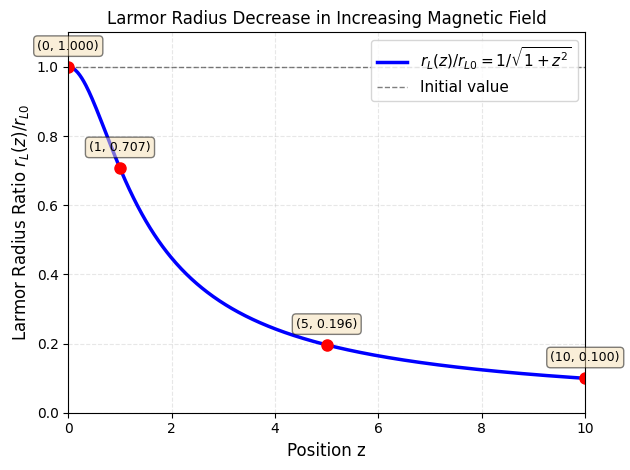

In [68]:
z = np.linspace(0, 10, 500)
# Calculate Larmor radius ratio
r_L_ratio = 1 / np.sqrt(1 + z**2)

plt.figure()
plt.plot(z, r_L_ratio, 'b-', linewidth=2.5, label=r'$r_L(z)/r_{L0} = 1/\sqrt{1+z^2}$')
plt.axhline(y=1, color='k', linestyle='--', linewidth=1, alpha=0.5, label='Initial value')
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)

# Mark some specific points
z_points = [0, 1, 5, 10]
for zp in z_points:
    rp = 1 / np.sqrt(1 + zp**2)
    plt.plot(zp, rp, 'ro', markersize=8)
    plt.text(zp, rp + 0.05, f'({zp:.0f}, {rp:.3f})', 
             ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Labels and formatting
plt.xlabel('Position z', fontsize=12)
plt.ylabel(r'Larmor Radius Ratio $r_L(z)/r_{L0}$', fontsize=12)
plt.title(r'Larmor Radius Decrease in Increasing Magnetic Field')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='upper right')
plt.xlim(0, 10)
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()

### Part (e) - Magnetic Mirror Turning Point

**Task:** Although the Larmor radius decreases in regions of higher magnetic field, the electron will not propagate indefinitely. As it spirals from low to high magnetic field, the parallel velocity gradually slows until the electron reverses direction. This is the "magnetic mirroring" effect used in ion discharge chambers to trap electrons.

Consider the case where the electron starts at $z=0$, $v_{\perp 0} = 2000$ km/s, and $v_{z0} = 400$ km/s. Find the location $z^*$ where the electron turns around.

**Hint:** Magnetic fields do no work, so kinetic energy $KE = \frac{m_e}{2}(v_\perp^2 + v_z^2)$ is conserved.

First, we will start with conservation laws. Two quantities are conserved:

1. Magnetic moment: $\mu = \frac{m_e v_\perp^2}{2B_0} = \text{constant}$
2. Kinetic energy: $KE = \frac{m_e}{2}(v_\perp^2 + v_z^2) = \text{constant}$

Writing these at $z=0$ and $z=z^*$:

At $z=0$:
$$\mu = \frac{m_e v_{\perp 0}^2}{2B_0(0)}$$
$$KE = \frac{m_e}{2}(v_{\perp 0}^2 + v_{z0}^2)$$

At the turning point $z=z^*$, the parallel velocity becomes zero: $v_z(z^*) = 0$

$$\mu = \frac{m_e v_\perp(z^*)^2}{2B_0(z^*)}$$
$$KE = \frac{m_e}{2}v_\perp(z^*)^2 \quad$$

From $\mu$ conservation:
$$\frac{m_e v_{\perp 0}^2}{2B_0(0)} = \frac{m_e v_\perp(z^*)^2}{2B_0(z^*)}$$

$$v_\perp(z^*)^2 = v_{\perp 0}^2 \frac{B_0(z^*)}{B_0(0)}$$

From $KE$ conservation:
$$v_{\perp 0}^2 + v_{z0}^2 = v_\perp(z^*)^2$$

Then, we combine the two equations. Substituting the expression for $v_\perp(z^*)^2$:

$$v_{\perp 0}^2 + v_{z0}^2 = v_{\perp 0}^2 \frac{B_0(z^*)}{B_0(0)}$$

$$1 + \frac{v_{z0}^2}{v_{\perp 0}^2} = \frac{B_0(z^*)}{B_0(0)}$$

Now, we solve for $B_0(z^*)$

$$\frac{B_0(z^*)}{B_0(0)} = 1 + \frac{v_{z0}^2}{v_{\perp 0}^2}$$

And applying the specific magnetic field profile:

Given $B_0(z) = B_0(0)(1 + z^2)$:

$$\frac{B_0(0)(1 + z^{*2})}{B_0(0)} = 1 + \frac{v_{z0}^2}{v_{\perp 0}^2}$$

$$1 + z^{*2} = 1 + \frac{v_{z0}^2}{v_{\perp 0}^2}$$

$$z^{*2} = \frac{v_{z0}^2}{v_{\perp 0}^2}$$

$$z^* = \frac{v_{z0}}{v_{\perp 0}}$$

Given:
- $v_{\perp 0} = 2000$ km/s
- $v_{z0} = 400$ km/s

$$z^* = \frac{400}{2000} = 0.2$$

$$\boxed{z^* = 0.2 \text{ (in units where the magnetic field is } B_0(z) = B_0(0)(1+z^2)\text{)}}$$

### Part (f) - Mirror Ratio for Particle Trapping

**Task:** Not all particles are trapped by a magnetic mirror. Consider the case where the walls are located at $z = \pm L$. If the electrons have finite velocity along the magnetic field at these locations, they will escape to the walls. Show that for an electron to remain trapped it must satisfy the "mirror ratio":

$$\frac{v_{\perp 0}}{|\vec{v}_0|} > \sqrt{\frac{B_0(0)}{B_0(L)}}$$

For a particle to be trapped, it must turn around (i.e., $v_z = 0$) before reaching the wall at $z = L$. This means the turning point $z^*$ must satisfy:
$$z^* < L$$

If $z^* \geq L$, the particle will hit the wall and escape. From Part (e), we found that at the turning point:
$$\frac{B_0(z^*)}{B_0(0)} = 1 + \frac{v_{z0}^2}{v_{\perp 0}^2} = \frac{v_{\perp 0}^2 + v_{z0}^2}{v_{\perp 0}^2} = \frac{|\vec{v}_0|^2}{v_{\perp 0}^2}$$

where $|\vec{v}_0| = \sqrt{v_{\perp 0}^2 + v_{z0}^2}$ is the initial speed.

Therefore:
$$B_0(z^*) = B_0(0) \frac{|\vec{v}_0|^2}{v_{\perp 0}^2}$$

For the particle to turn around before reaching the wall (trapping condition), we need:
$$z^* < L$$

Since $B_0(z)$ is monotonically increasing with $z$, this is equivalent to:
$$B_0(z^*) < B_0(L)$$

Substituting the expression for $B_0(z^*)$:
$$B_0(0) \frac{|\vec{v}_0|^2}{v_{\perp 0}^2} < B_0(L)$$

$$\frac{|\vec{v}_0|^2}{v_{\perp 0}^2} < \frac{B_0(L)}{B_0(0)}$$

Taking the square root of both sides:
$$\frac{|\vec{v}_0|}{v_{\perp 0}} < \sqrt{\frac{B_0(L)}{B_0(0)}}$$

Taking the reciprocal (and reversing the inequality):
$$\frac{v_{\perp 0}}{|\vec{v}_0|} > \sqrt{\frac{B_0(0)}{B_0(L)}}$$

So:

$$\boxed{\frac{v_{\perp 0}}{|\vec{v}_0|} > \sqrt{\frac{B_0(0)}{B_0(L)}}}$$

This is the criterion for particle trapping (mirror ratio). For a high mirror ratio, more particles are trapped. A stronger magnetic field at the mirrors is more effective at reflecting particles. For a ratio near 1, fewer particles are trapped. The magnetic field variation is too weak to reflect most particles.

## Problem 2: Space Charge Limits in Gridded Ion Thrusters

### Problem Statement

Consider an NSTAR-like gridded ion thruster with the following parameters:

- Efficiency: $\eta = 0.8$ (80%)
- Thruster surface area: $A = 0.1$ m²
- Grid spacing: $d = 1$ mm $= 0.001$ m
- Propellant: Xenon (atomic mass $M = 131.293$ amu $= 2.18 \times 10^{-25}$ kg)
- Ion charge: $q = 1.602 \times 10^{-19}$ C (singly charged)

The space charge limited current density is given by the Child-Langmuir equation (Jahn Eq. 7-8):

$$j_{max} = \frac{4\epsilon_0}{9}\sqrt{\frac{2q}{M}}\frac{V_0^{3/2}}{d^2}$$

The thrust per unit area relates to current density:

$$\frac{T}{A} = \dot{m}v_a = \frac{jMv_a}{q} = \frac{8\epsilon_0}{9}\left(\frac{V_0}{d}\right)^2$$

In [69]:
epsilon_0 = 8.854e-12  # Permittivity of free space (F/m)
q = 1.602e-19          # Elementary charge (C)
g = 9.81               # Standard gravity (m/s²)
M_Xe = 2.18e-25        # Xenon mass (kg)
M_H2 = 3.35e-27        # Hydrogen mass (kg)
eta = 0.8              # Efficiency
A = 0.1                # Thruster area (m²)
d = 0.001              # Grid spacing (m)
P_input = 2300         # Input power (W)

### Part (a) - Space Charge Free Operating Region

**Task:** Create a graph with thrust $T$ on the y-axis (range 0 to 1.5 N) and specific impulse $I_{sp}$ on the x-axis (range 1000 to 6000 s). Color in the region where space charge effects can be ignored, i.e., $j < j_{max}$.

First, we need to establish the key relationships. The exhaust velocity relates to specific impulse:
$$v_a = I_{sp} \cdot g$$

The beam voltage relates to exhaust velocity:
$$V_0 = \frac{M v_a^2}{2q} = \frac{M (I_{sp} \cdot g)^2}{2q}$$

The current density relates to thrust:
$$j = \frac{T \cdot q}{A \cdot M \cdot v_a} = \frac{T \cdot q}{A \cdot M \cdot I_{sp} \cdot g}$$

At the space charge limit, the thrust per unit area is given by:
$$\frac{T}{A} = \frac{8\epsilon_0}{9}\left(\frac{V_0}{d}\right)^2$$

Substituting $V_0 = \frac{M (I_{sp} \cdot g)^2}{2q}$:

$$T_{max} = \frac{8\epsilon_0 A}{9d^2} V_0^2 = \frac{8\epsilon_0 A}{9d^2} \left[\frac{M (I_{sp} \cdot g)^2}{2q}\right]^2$$

Simplifying:
$$T_{max} = \frac{8\epsilon_0 A}{9d^2} \cdot \frac{M^2 (I_{sp} \cdot g)^4}{4q^2}$$

$$T_{max}(I_{sp}) = \frac{2\epsilon_0 A M^2 g^4}{9 q^2 d^2} I_{sp}^4$$

This gives us the boundary of the space-charge-free region. Note that thrust scales as the fourth power of specific impulse at the space charge limit.

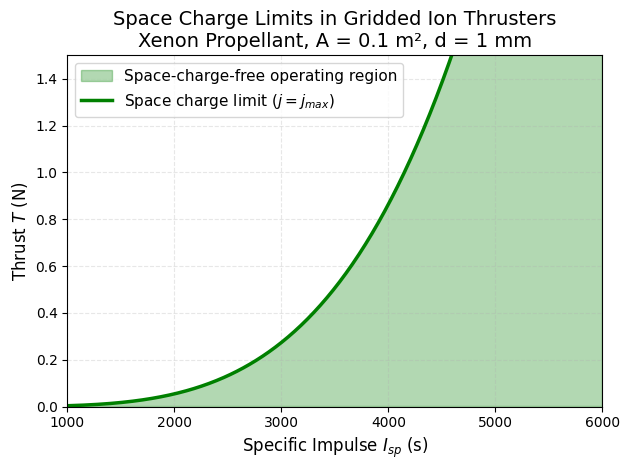

In [70]:
I_sp_range = np.linspace(1000, 6000, 500)

def calc_T_max_space_charge(I_sp, M, A, d):
    T_max = (2 * epsilon_0 * A * M**2 * g**4 / (9 * q**2 * d**2)) * I_sp**4
    return T_max

T_max_Xe = calc_T_max_space_charge(I_sp_range, M_Xe, A, d)
plt.figure()

# Fill the space-charge-free region (below the limit)
plt.fill_between(I_sp_range, 0, T_max_Xe, 
                 alpha=0.3, color='green', 
                 label='Space-charge-free operating region')

# Plot the space charge limit boundary
plt.plot(I_sp_range, T_max_Xe, 'g-', linewidth=2.5, 
         label='Space charge limit ($j = j_{max}$)')

# Labels and formatting
plt.xlabel('Specific Impulse $I_{sp}$ (s)', fontsize=12)
plt.ylabel('Thrust $T$ (N)', fontsize=12)
plt.title('Space Charge Limits in Gridded Ion Thrusters\n' + 
          'Xenon Propellant, A = 0.1 m², d = 1 mm', fontsize=14)
plt.xlim(1000, 6000)
plt.ylim(0, 1.5)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='upper left')

plt.tight_layout()
plt.show()

### Part (b) - Constant Power Curve

**Task:** Suppose the propulsion system has an input power of 2.3 kW. On the same graph from (a), generate a curve showing the thrust $T$ as a function of specific impulse $I_{sp}$ from 1000 to 6000 s.

The power relationship for an ion thruster is:
$$P_{input} = \frac{T \cdot I_{sp} \cdot g}{2\eta}$$

This comes from the fact that the jet power is $P_{jet} = \frac{1}{2}\dot{m}v_a^2 = \frac{T v_a}{2}$, and with efficiency $\eta$, we have $P_{input} = P_{jet}/\eta$.

Solving for thrust:
$$T = \frac{2\eta P_{input}}{I_{sp} \cdot g}$$

This shows that for constant power, thrust and specific impulse are inversely related. High specific impulse missions sacrifice thrust for better propellant efficiency.

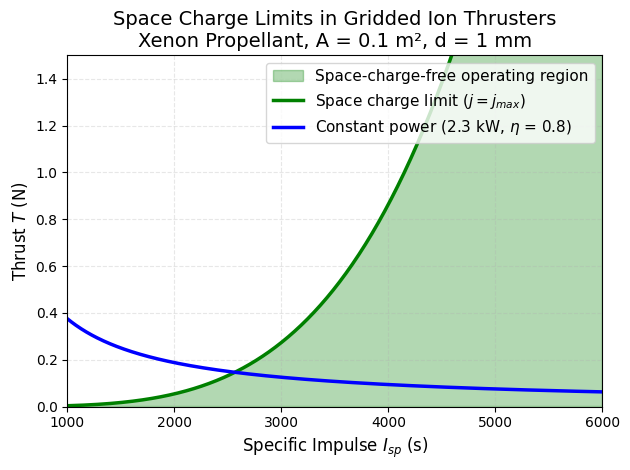

In [71]:
def calc_T_constant_power(I_sp, P, eta):
    return (2 * eta * P) / (I_sp * g)

T_constant_power = calc_T_constant_power(I_sp_range, P_input, eta)

plt.figure()
plt.fill_between(I_sp_range, 0, T_max_Xe, 
                 alpha=0.3, color='green', 
                 label='Space-charge-free operating region')
plt.plot(I_sp_range, T_max_Xe, 'g-', linewidth=2.5, 
         label='Space charge limit ($j = j_{max}$)')
plt.plot(I_sp_range, T_constant_power, 'b-', linewidth=2.5, 
         label=f'Constant power ({P_input/1000:.1f} kW, $\\eta$ = {eta})')

plt.xlabel('Specific Impulse $I_{sp}$ (s)', fontsize=12)
plt.ylabel('Thrust $T$ (N)', fontsize=12)
plt.title('Space Charge Limits in Gridded Ion Thrusters\n' + 
          'Xenon Propellant, A = 0.1 m², d = 1 mm', fontsize=14)
plt.xlim(1000, 6000)
plt.ylim(0, 1.5)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='upper right')
plt.tight_layout()
plt.show()

### Part (c) - Minimum Specific Impulse

**Task:** For the 2.3 kW system described in (b), find the minimum specific impulse that can be achieved before space charge effects must be considered.

We need to find where the constant power curve intersects the space charge limit:
$$\frac{2\eta P_{input}}{I_{sp} \cdot g} = \frac{2\epsilon_0 A M^2 g^4}{9 q^2 d^2} I_{sp}^4$$

Rearranging:
$$2\eta P_{input} = \frac{2\epsilon_0 A M^2 g^4}{9 q^2 d^2} I_{sp}^4 \cdot I_{sp} \cdot g$$

$$2\eta P_{input} = \frac{2\epsilon_0 A M^2 g^5}{9 q^2 d^2} I_{sp}^5$$

$$I_{sp}^5 = \frac{2\eta P_{input} \cdot 9 q^2 d^2}{2\epsilon_0 A M^2 g^5}$$

$$I_{sp}^5 = \frac{9\eta P_{input} q^2 d^2}{\epsilon_0 A M^2 g^5}$$

$$I_{sp,min} = \left(\frac{9\eta P_{input} q^2 d^2}{\epsilon_0 A M^2 g^5}\right)^{1/5}$$

In [72]:
# Calculate minimum specific impulse analytically
I_sp_min_analytical = ((9 * eta * P_input * q**2 * d**2) / 
                       (epsilon_0 * A * M_Xe**2 * g**5))**(1/5)
print(f"\nMinimum specific impulse: I_sp,min = {I_sp_min_analytical:.1f} s")
# Verify by finding intersection numerically
from scipy.optimize import fsolve

def intersection_eq(I_sp):
    T_power = calc_T_constant_power(I_sp, P_input, eta)
    T_space_charge = calc_T_max_space_charge(I_sp, M_Xe, A, d)
    return T_power - T_space_charge

I_sp_min_numerical = fsolve(intersection_eq, 2500)[0]
print(f"Numerical verification: I_sp,min = {I_sp_min_numerical:.1f} s")


Minimum specific impulse: I_sp,min = 2565.7 s
Numerical verification: I_sp,min = 2565.7 s


### Part (d) - Required Area for 300 mN Thrust

**Task:** Suppose I want the system to be able to operate at a thrust of 300 mN without the effects of space-charge limits. I am allowed to build a larger thruster (same input power). How big of an area should the new thruster design be?

For a given thrust and power, the specific impulse is determined by:
$$I_{sp} = \frac{2\eta P_{input}}{T \cdot g}$$

At this operating point, we need the actual current density to be below the space charge limit:
$$j = \frac{T \cdot q}{A \cdot M \cdot I_{sp} \cdot g} < j_{max}$$

Using the maximum thrust formula derived in part (a):
$$T \leq \frac{8\epsilon_0 A}{9d^2}\left(\frac{M I_{sp}^2 g^2}{2q}\right)$$

Solving for the required area:
$$A \geq \frac{9d^2 T q}{8\epsilon_0 M I_{sp}^2 g^2}$$

Substituting the expression for $I_{sp}$:
$$A \geq \frac{9d^2 T^3 g^2 q}{8\epsilon_0 M (2\eta P_{input})^2}$$

In [73]:
T_desired = 0.3  # 300 mN in Newtons
I_sp_at_300mN = (2 * eta * P_input) / (T_desired * g)
A_required = (9 * d**2 * T_desired**3 * g**2 * q) / \
             (8 * epsilon_0 * M_Xe * (2 * eta * P_input)**2)
print(f"\nOriginal thruster area: A_0 = {A} m²")
print(f"Required thruster area: A_req = {A_required:.4f} m²")
print(f"\nThe new thruster must be {A_required/A:.0f}x larger.")


Original thruster area: A_0 = 0.1 m²
Required thruster area: A_req = 17915.3445 m²

The new thruster must be 179153x larger.


### Part (e) - Hydrogen Propellant

**Task:** Suppose I select hydrogen (H₂) as my propellant. How big of an area should the thruster design be to achieve 300 mN?

Using the same formula from part (d), but with hydrogen mass:
$$A \geq \frac{9d^2 T^3 g^2 q}{8\epsilon_0 M_{H_2} (2\eta P_{input})^2}$$

The key difference is that hydrogen is much lighter than xenon:
$$\frac{M_{Xe}}{M_{H_2}} = \frac{2.18 \times 10^{-25}}{3.35 \times 10^{-27}} \approx 65$$

Since the required area is inversely proportional to mass, a lighter propellant requires a larger thruster area to avoid space charge limits at the same thrust and power.

In [74]:
# Calculate required area for hydrogen
A_required_H2 = (9 * d**2 * T_desired**3 * g**2 * q) / \
                (8 * epsilon_0 * M_H2 * (2 * eta * P_input)**2)
# Calculate Isp for hydrogen at same thrust and power
I_sp_H2 = (2 * eta * P_input) / (T_desired * g)

print(f"\nDesired thrust: T = {T_desired*1000:.0f} mN")
print(f"Power: P = {P_input/1000:.1f} kW")
print(f"Operating Isp: {I_sp_H2:.1f} s (same for both propellants at fixed T and P)")
print(f"\nRequired areas:")
print(f"  Xenon: A_Xe = {A_required:.4f} m²")
print(f"  Hydrogen: A_H2 = {A_required_H2:.4f} m²")
print(f"  Area ratio: A_H2/A_Xe = {A_required_H2/A_required:.1f}")
print(f"\nThe hydrogen thruster must be {A_required_H2/A_required:.1f}x larger than xenon!")
print(f"This is approximately equal to the mass ratio M_Xe/M_H2.")


Desired thrust: T = 300 mN
Power: P = 2.3 kW
Operating Isp: 1250.4 s (same for both propellants at fixed T and P)

Required areas:
  Xenon: A_Xe = 17915.3445 m²
  Hydrogen: A_H2 = 1165834.3605 m²
  Area ratio: A_H2/A_Xe = 65.1

The hydrogen thruster must be 65.1x larger than xenon!
This is approximately equal to the mass ratio M_Xe/M_H2.


---

## Problem 3: NSTAR Thruster Grid Spacing Analysis

### Problem Statement

The actual measurements for the NSTAR gridded ion thruster are:

- Diameter: 30 cm (radius = 15 cm)
- Cold grid gap: 0.66 mm
- Grid material: Molybdenum
- Operating power: 2.3 kW
- Reported specific impulse: 3380 seconds
- Efficiency: 66%
- Beam voltage: 1110 V
- Reported thrust: 91 mN
- Thermal expansion during operation: -0.36 mm change to grid gap

The space charge limit equation (from Problem 2):

$$\frac{T}{A} = \frac{8\epsilon_0}{9}\left(\frac{V_0}{d}\right)^2$$

In [75]:
diameter_NSTAR = 0.30  # m
radius_NSTAR = 0.15  # m
area_NSTAR = np.pi * radius_NSTAR**2  # m²
cold_gap = 0.66e-3  # m (0.66 mm)
thermal_change = -0.36e-3  # m (gap reduces by 0.36 mm when hot)
hot_gap = cold_gap + thermal_change  # m (0.30 mm)
beam_voltage = 1110  # V
reported_thrust = 91e-3  # N (91 mN)
Isp_NSTAR = 3380  # seconds
efficiency_NSTAR = 0.66
power_NSTAR = 2300  # W
# Arcing limit for Molybdenum
E_arc = 100e3 * 100  # V/m (100 kV/cm converted to V/m)

### Part (a) - Maximum Thrust with Cold Gap

**Task:** Using the space charge limit equation, what is the maximum thrust the NSTAR can produce at the given condition? Does the reported 91 mN thrust fall within this limit?

Using the space charge limit equation from Problem 2:
$$T_{max} = A \cdot \frac{8\epsilon_0}{9}\left(\frac{V_0}{d}\right)^2$$

With the cold gap $d = 0.66$ mm and beam voltage $V_0 = 1110$ V:
$$T_{max} = \frac{8\epsilon_0 A}{9 d^2} V_0^2$$

Substituting the NSTAR parameters:
$$T_{max} = \frac{8 \times 8.854 \times 10^{-12} \times \pi (0.15)^2}{9 \times (0.66 \times 10^{-3})^2} \times (1110)^2$$

In [76]:
# Calculate maximum thrust with cold gap
T_max_cold = (8 * epsilon_0 * area_NSTAR / (9 * cold_gap**2)) * beam_voltage**2

# Compare with reported thrust
margin_cold = T_max_cold - reported_thrust
margin_percent_cold = (margin_cold / T_max_cold) * 100

print(f"Cold gap: d = {cold_gap*1000:.2f} mm")
print(f"Beam voltage: V₀ = {beam_voltage} V")
print(f"Thruster area: A = {area_NSTAR:.4f} m²")
print(f"\nMaximum thrust: T_max = {T_max_cold*1000:.2f} mN")
print(f"Reported thrust: T_reported = {reported_thrust*1000:.0f} mN")
print(f"Margin: {margin_cold*1000:.2f} mN ({margin_percent_cold:.1f}% below limit)")

Cold gap: d = 0.66 mm
Beam voltage: V₀ = 1110 V
Thruster area: A = 0.0707 m²

Maximum thrust: T_max = 1573.54 mN
Reported thrust: T_reported = 91 mN
Margin: 1482.54 mN (94.2% below limit)


Yes, it falls within this limit.

### Part (b) - Maximum Thrust with Hot Gap

**Task:** An important caveat to the reported 0.66 mm spacing is that it is the cold grid gap. Measurements during the 2.3 kW operation showed a change to the grid gap of -0.36 mm. Using this information, how does the reported 91 mN of thrust compare to the maximum thrust allowed by the space charge limit?

The hot gap is:
$$d_{hot} = d_{cold} + \Delta d = 0.66 - 0.36 = 0.30 \text{ mm}$$

The maximum thrust scales as $1/d^2$, so reducing the gap dramatically reduces the space charge limit:
$$T_{max,hot} = \frac{8\epsilon_0 A}{9 d_{hot}^2} V_0^2$$

The ratio of limits is:
$$\frac{T_{max,hot}}{T_{max,cold}} = \left(\frac{d_{cold}}{d_{hot}}\right)^2 = \left(\frac{0.66}{0.30}\right)^2 = 4.84$$

In [77]:
T_max_hot = (8 * epsilon_0 * area_NSTAR / (9 * hot_gap**2)) * beam_voltage**2

# Compare with reported thrust
margin_hot = T_max_hot - reported_thrust
ratio_limits = T_max_cold / T_max_hot

print(f"Cold gap: d_cold = {cold_gap*1000:.2f} mm")
print(f"Thermal change: Δd = {thermal_change*1000:.2f} mm")
print(f"Hot gap: d_hot = {hot_gap*1000:.2f} mm")
print(f"\nMaximum thrust (cold): T_max,cold = {T_max_cold*1000:.2f} mN")
print(f"Maximum thrust (hot): T_max,hot  = {T_max_hot*1000:.2f} mN")
print(f"Reported thrust: T_reported = {reported_thrust*1000:.0f} mN")

margin_percent_hot = ((T_max_hot - reported_thrust) / T_max_hot) * 100
print(f"\nMargin: {margin_hot*1000:.2f} mN ({margin_percent_hot:.1f}% below limit)")
print(f"Operating at {(reported_thrust/T_max_hot)*100:.1f}% of the hot gap limit")

Cold gap: d_cold = 0.66 mm
Thermal change: Δd = -0.36 mm
Hot gap: d_hot = 0.30 mm

Maximum thrust (cold): T_max,cold = 1573.54 mN
Maximum thrust (hot): T_max,hot  = 7615.93 mN
Reported thrust: T_reported = 91 mN

Margin: 7524.93 mN (98.8% below limit)
Operating at 1.2% of the hot gap limit


With thermal expansion during operation, the grid gap reduces from 0.66 mm to 0.30 mm. This smaller gap actually increases the space charge limit (since $T_{\max} \propto 1/d^2$). The maximum thrust with the hot gap is 7615.93 mN, which is significantly higher than the cold gap limit. The reported 91 mN thrust still falls well within this limit, operating at only 1.2% of capacity with a margin of 7524.93 mN (98.8% below limit).

Despite the thermal expansion reducing the gap by 55%, the reported thrust remains safely within the space charge limit.

$$\boxed{T_{\max,\text{hot}} = 7615.93 \text{ mN} > 91 \text{ mN} \quad}$$

### Part (c) -  Thermal Expansion

In [78]:
# Calculate electric fields
E_cold = beam_voltage / cold_gap  # V/m
E_hot = beam_voltage / hot_gap    # V/m

# Convert to kV/cm for comparison
E_cold_kVcm = E_cold / 1e5
E_hot_kVcm = E_hot / 1e5
E_arc_kVcm = E_arc / 1e5

# Calculate safety margins
margin_cold_arcing = (E_arc - E_cold) / E_arc * 100
margin_hot_arcing = (E_arc - E_hot) / E_arc * 100

print(f"Arcing threshold: E_arc = {E_arc_kVcm:.0f} kV/cm")
print(f"\nCold gap (d = {cold_gap*1000:.2f} mm):")
print(f"E_cold = {E_cold_kVcm:.1f} kV/cm")
print(f"Margin: {margin_cold_arcing:.1f}% below threshold")

print(f"\nHot gap (d = {hot_gap*1000:.2f} mm):")
print(f"E_hot = {E_hot_kVcm:.1f} kV/cm")
print(f"Margin: {margin_hot_arcing:.1f}% below threshold")

Arcing threshold: E_arc = 100 kV/cm

Cold gap (d = 0.66 mm):
E_cold = 16.8 kV/cm
Margin: 83.2% below threshold

Hot gap (d = 0.30 mm):
E_hot = 37.0 kV/cm
Margin: 63.0% below threshold


In short, there is no arcing risk. Accounting for thermal expansion and the arcing constraint, the closest grid gap we can achieve is determined by the arcing limit:

$$d_{\min,\text{hot}} = \frac{V_0}{E_{\text{arc}}} = \frac{1110 \text{ V}}{100 \text{ kV/cm}} = 0.111 \text{ mm}$$

This requires a cold gap of:

$$d_{\min,\text{cold}} = 0.111 + 0.36 = 0.471 \text{ mm}$$

At this minimum gap spacing, the maximum thrust would be 55,631.32 mN, representing a 630.5% increase (7.30x higher) compared to the actual NSTAR hot gap design (7615.93 mN).

The NSTAR's actual 0.30 mm hot gap is more conservative than the arcing-limited minimum, suggesting other design constraints (mechanical stability, manufacturing tolerances, grid flatness) prevent achieving the theoretical optimum.

### Part (d) - Minimum Gap and Maximum Thrust

**Task:** Accounting for thermal expansion and for the same beam voltage, what is the closest grid gap we can achieve? How much would this change the maximum thrust we could achieve?

The minimum hot gap is determined by the arcing limit:
$$E_{arc} = \frac{V_0}{d_{min,hot}}$$

$$d_{min,hot} = \frac{V_0}{E_{arc}} = \frac{1110 \text{ V}}{100 \text{ kV/cm}}$$

Since the gap shrinks by 0.36 mm during operation, the minimum cold gap is:
$$d_{min,cold} = d_{min,hot} + 0.36 \text{ mm}$$

The maximum thrust at this minimum gap is:
$$T_{max,optimized} = \frac{8\epsilon_0 A}{9 d_{min,hot}^2} V_0^2$$

The improvement over the actual NSTAR design:
$$\text{Improvement} = \frac{T_{max,optimized} - T_{max,hot}}{T_{max,hot}} \times 100\%$$

In [79]:
# Calculate minimum gap from arcing constraint
d_min_hot = beam_voltage / E_arc  # m
d_min_cold = d_min_hot - thermal_change  # Account for thermal expansion

# Calculate maximum thrust at minimum gap
T_max_optimized = (8 * epsilon_0 * area_NSTAR / (9 * d_min_hot**2)) * beam_voltage**2

# Compare to actual NSTAR
improvement = (T_max_optimized - T_max_hot) / T_max_hot * 100
ratio_to_actual = T_max_optimized / T_max_hot

print(f"\nConstraint: Arcing limit at E = {E_arc_kVcm:.0f} kV/cm")
print(f"Beam voltage: V₀ = {beam_voltage} V (fixed)")
print(f"Thermal expansion: Δd = {thermal_change*1000:.2f} mm (fixed)")
print(f"\nMinimum hot gap: d_min,hot = {d_min_hot*1000:.3f} mm")
print(f"Minimum cold gap: d_min,cold = {d_min_cold*1000:.3f} mm")
print(f"\nComparison to NSTAR:")
print(f"Actual cold gap: {cold_gap*1000:.2f} mm")
print(f"Actual hot gap: {hot_gap*1000:.2f} mm")
print(f"Optimal hot gap: {d_min_hot*1000:.3f} mm ({(1 - d_min_hot/hot_gap)*100:.1f}% closer)")
print(f"\nMaximum thrust:")
print(f"Actual (hot): T_max,hot = {T_max_hot*1000:.2f} mN")
print(f"Optimized (hot): T_max,opt = {T_max_optimized*1000:.2f} mN")
print(f"\nImprovement: {improvement:.1f}% increase in maximum thrust")
print(f"(Factor of {ratio_to_actual:.2f}x higher)")



Constraint: Arcing limit at E = 100 kV/cm
Beam voltage: V₀ = 1110 V (fixed)
Thermal expansion: Δd = -0.36 mm (fixed)

Minimum hot gap: d_min,hot = 0.111 mm
Minimum cold gap: d_min,cold = 0.471 mm

Comparison to NSTAR:
Actual cold gap: 0.66 mm
Actual hot gap: 0.30 mm
Optimal hot gap: 0.111 mm (63.0% closer)

Maximum thrust:
Actual (hot): T_max,hot = 7615.93 mN
Optimized (hot): T_max,opt = 55631.32 mN

Improvement: 630.5% increase in maximum thrust
(Factor of 7.30x higher)


---

## Problem 4: Discharge Chamber Current Analysis

### Problem Statement

In class we made the approximation that in an ion discharge chamber without magnetic field, the discharge current $I_d$ can be related to the beam current $I_b$. We derive that result here.

Note that the electron continuity equation can be written as:

$$\frac{\partial n_e}{\partial t} = \frac{n_e v_e}{\lambda_{mfp}}$$

where $\lambda_{mfp}$ is the mean free path for ionization, $v_e$ is the electron velocity, and $n_e$ is the electron density. This expression relates the rate of increase in local electron density to ionization.

**Assumptions:**

- The neutral density and electron density in the discharge chamber are spatially uniform
- The electrons in the discharge current all have the same drift velocity, $v_e$
- Every charge created per second contributes directly to the beam current
- The cross-sectional area of the discharge chamber is $A$
- The characteristic length is $L$

### Part (a) - Discharge Current Relation

**Task:** Subject to these assumptions, show that we can write:

$$I_d = \frac{\lambda_{mfp}}{L} I_b$$

We begin with the steady-state condition. In steady state, the production rate of ions must balance the extraction rate (beam current). The production rate of ions in the chamber is given by:

$$\frac{dN_{ions}}{dt} = \frac{n_e \cdot V}{\tau_{ion}}$$

where $V = A \cdot L$ is the volume of the discharge chamber, and $\tau_{ion}$ is the characteristic time for ionization.

The ionization time is related to the mean free path and electron velocity:
$$\tau_{ion} = \frac{\lambda_{mfp}}{v_e}$$

Therefore, the ion production rate becomes:
$$\frac{dN_{ions}}{dt} = \frac{n_e \cdot A \cdot L \cdot v_e}{\lambda_{mfp}}$$

Next, we relate currents to particle fluxes. The beam current (ion extraction rate) is:
$$I_b = q \cdot \frac{dN_{ions}}{dt} = q \cdot \frac{n_e \cdot A \cdot L \cdot v_e}{\lambda_{mfp}}$$

The discharge current is the electron flux entering the chamber:
$$I_d = q \cdot n_e \cdot A \cdot v_e$$

Now we can find the ratio. Taking the ratio of discharge current to beam current:
$$\frac{I_d}{I_b} = \frac{q \cdot n_e \cdot A \cdot v_e}{q \cdot \frac{n_e \cdot A \cdot L \cdot v_e}{\lambda_{mfp}}}$$

Simplifying:
$$\frac{I_d}{I_b} = \frac{q \cdot n_e \cdot A \cdot v_e \cdot \lambda_{mfp}}{q \cdot n_e \cdot A \cdot L \cdot v_e} = \frac{\lambda_{mfp}}{L}$$

Therefore:

$$\boxed{I_d = \frac{\lambda_{mfp}}{L} I_b}$$

**Physical interpretation:** This result shows that the discharge current is proportional to the beam current, with the ratio determined by the mean free path for ionization relative to the chamber length. A longer mean free path (fewer collisions) requires more discharge current to maintain the same ion production rate.

### Part (b) - Magnetic Mirror Effect

**Task:** In order to increase the effective length of the discharge chamber, we introduce the same magnetic mirror as described in Problem 1(f). This traps the electrons in the discharge chamber for a longer period of time until the electron ultimately has a collision after traversing an effective distance $\lambda_{mfp}$.

Suppose the ionization collision occurs at the middle of the mirror ($z = 0$) and that after every collision the electron's velocity direction is randomized so that $v_{\perp 0}/|\vec{v}_0|$ has an equal chance of taking any value from 0 to 1. The bounds of the chamber are given by $z = \pm L$.

Given these assumptions, what is the average ratio $I_d/I_b$?

From Problem 1(f), the mirror ratio for trapping is:
$$\frac{v_{\perp 0}}{|\vec{v}_0|} > \sqrt{\frac{B_0(0)}{B_0(L)}}$$

Let's define the critical pitch angle ratio:
$$\alpha_c = \sqrt{\frac{B_0(0)}{B_0(L)}}$$

Electrons are trapped if $v_{\perp 0}/|\vec{v}_0| > \alpha_c$ and untrapped if $v_{\perp 0}/|\vec{v}_0| \leq \alpha_c$.

Since the pitch angle ratio is uniformly distributed from 0 to 1, the probability of being trapped is:
$$P_{trapped} = \int_{\alpha_c}^{1} d\alpha = 1 - \alpha_c$$

The probability of escaping is:
$$P_{escaped} = \alpha_c$$

Now we determine the effective path length for each case:

- Trapped electrons: These electrons bounce back and forth between the mirrors, traversing the full mean free path $\lambda_{mfp}$ before their next ionizing collision.
- Untrapped electrons: These electrons escape to the walls after traveling approximately the chamber length $L$.

Using the result from part (a), the ratio $I_d/I_b$ depends on the effective path length $L_{eff}$:

For trapped electrons, they traverse distance $\lambda_{mfp}$ before ionizing, so effectively $L_{eff} = \lambda_{mfp}$, giving $I_d/I_b = 1$.

For untrapped electrons, they only traverse distance $L$ before escaping, so $L_{eff} = L$, giving $I_d/I_b = \lambda_{mfp}/L$.

The average ratio is:
$$\left\langle\frac{I_d}{I_b}\right\rangle = (1 - \alpha_c) \cdot 1 + \alpha_c \cdot \frac{\lambda_{mfp}}{L}$$

$$\left\langle\frac{I_d}{I_b}\right\rangle = 1 - \alpha_c + \alpha_c \cdot \frac{\lambda_{mfp}}{L}$$

$$\boxed{\left\langle\frac{I_d}{I_b}\right\rangle = 1 - \alpha_c\left(1 - \frac{\lambda_{mfp}}{L}\right) = 1 - \sqrt{\frac{B_0(0)}{B_0(L)}}\left(1 - \frac{\lambda_{mfp}}{L}\right)}$$

For a typical case where $\lambda_{mfp} \ll L$ (mean free path much shorter than chamber length) and using the magnetic field profile from Problem 1 where $B_0(L)/B_0(0) = 1 + L^2$:

$$\alpha_c = \sqrt{\frac{1}{1 + L^2}}$$

In [80]:
# Example calculation for Part (b)
# Assume L = 1 (normalized units) with magnetic field B(z) = B(0)(1 + z^2)
L_chamber = 1.0
B_ratio = (1 + L_chamber**2)  # B(L)/B(0)
alpha_c = np.sqrt(1 / B_ratio)

# Assume lambda_mfp << L (e.g., lambda_mfp/L = 0.1)
lambda_over_L = 0.1

# Calculate average I_d/I_b ratio
P_trapped = 1 - alpha_c
P_escaped = alpha_c

Id_Ib_trapped = 1  # Trapped electrons traverse full lambda_mfp
Id_Ib_escaped = lambda_over_L  # Escaped electrons only traverse L

Id_Ib_average = P_trapped * Id_Ib_trapped + P_escaped * Id_Ib_escaped

print(f"Magnetic field ratio: B(L)/B(0) = {B_ratio:.2f}")
print(f"Critical pitch angle ratio: α_c = {alpha_c:.3f}")
print(f"Fraction trapped: {P_trapped:.1%}")
print(f"Fraction escaped: {P_escaped:.1%}")
print(f"\nAssuming λ_mfp/L = {lambda_over_L:.2f}:")
print(f"Average <I_d/I_b> = {Id_Ib_average:.3f}")
print(f"\nWithout magnetic mirror (from Part a): I_d/I_b = {lambda_over_L:.2f}")
print(f"Improvement factor: {Id_Ib_average/lambda_over_L:.2f}x")

Magnetic field ratio: B(L)/B(0) = 2.00
Critical pitch angle ratio: α_c = 0.707
Fraction trapped: 29.3%
Fraction escaped: 70.7%

Assuming λ_mfp/L = 0.10:
Average <I_d/I_b> = 0.364

Without magnetic mirror (from Part a): I_d/I_b = 0.10
Improvement factor: 3.64x


### Part (c) - Why $I_d/I_b > 1$ in Practice

**Task:** In practice, $I_d/I_b > 1$. Explain why this is the case.

In real discharge chambers, the ratio $I_d/I_b$ exceeds unity due to several loss mechanisms and inefficiencies:

1. Not all electrons entering the discharge chamber participate in ionization. Many electrons are lost to the chamber walls through collisions or electrostatic drift before they can ionize neutrals. These lost electrons contribute to $I_d$ but not to $I_b$.

2. A single ion extracted to the beam may require multiple ionization events to produce, especially if there is recombination or charge exchange. Each ionization event consumes an electron from the discharge current, increasing the $I_d/I_b$ ratio.

3. The ionization cross-section is energy-dependent. Electron-neutral collisions may not nessarily result in ionization, requiring more electrons to flow through the discharge to maintain the desired ion production rate.

6. Real discharge chambers have spatial non-uniformities. Regions of low ionization efficiency require higher discharge currents to compensate, increasing the overall $I_d/I_b$ ratio above the idealized uniform case.

The magnetic mirror confinement in Part (b) helps reduce $I_d/I_b$ by trapping electrons and increasing their residence time, but these practical loss mechanisms ensure that $I_d/I_b > 1$ in actual thrusters.